<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 준비</a></span><ul class="toc-item"><li><span><a href="#이미지-사이즈-조절" data-toc-modified-id="이미지-사이즈-조절-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>이미지 사이즈 조절</a></span></li><li><span><a href="#train-data-불러오기-&amp;-전처리" data-toc-modified-id="train-data-불러오기-&amp;-전처리-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>train data 불러오기 &amp; 전처리</a></span></li><li><span><a href="#작업한-이미지-확인" data-toc-modified-id="작업한-이미지-확인-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>작업한 이미지 확인</a></span></li></ul></li><li><span><a href="#딥러닝-네트워크-설계하기" data-toc-modified-id="딥러닝-네트워크-설계하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>딥러닝 네트워크 설계하기</a></span></li><li><span><a href="#딥러닝-네트워크-학습시키기" data-toc-modified-id="딥러닝-네트워크-학습시키기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>딥러닝 네트워크 학습시키기</a></span></li><li><span><a href="#모델-성능-검증하기" data-toc-modified-id="모델-성능-검증하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>모델 성능 검증하기</a></span><ul class="toc-item"><li><span><a href="#test-data-불러오기" data-toc-modified-id="test-data-불러오기-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>test data 불러오기</a></span></li><li><span><a href="#성능-측정하기" data-toc-modified-id="성능-측정하기-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>성능 측정하기</a></span></li><li><span><a href="#어떤-데이터를-잘못-추론했을까?" data-toc-modified-id="어떤-데이터를-잘못-추론했을까?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>어떤 데이터를 잘못 추론했을까?</a></span></li></ul></li></ul></div>

# 인공지능과 가위바위보 하기

## 데이터 준비

In [1]:
from PIL import Image
import os, glob

### 이미지 사이즈 조절

In [ ]:
import os

def resize_images(img_path):
    images= glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    # 이미지 파일 각각의 사이즈를 바꾸어 저장
    target_size = (122, 122)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
    return len(images)

In [2]:
# 가위, 바위, 보 디렉토리에 각각 함수 실행
# 총 이미지 개수 합산하여 number_of_data에 저장
number_of_data = 0
categories = ["rock", "scissor", "paper"]
for category in categories:
    image_dir_path = os.path.join(os.getenv("HOME") + "/aiffel/rock_scissor_paper/data_selected_user/" + category)
    number_of_data += resize_images(image_dir_path)

    print(category, "이미지 resize 완료")

701 images to be resized.
701  images resized.
rock 이미지 resize 완료
702 images to be resized.
702  images resized.
scissor 이미지 resize 완료
702 images to be resized.
702  images resized.
paper 이미지 resize 완료


<b>ANTIALIAS ? </b>
- ANTIALIAS: anti alias(위신호 제거)
- 높은 해상도의 사진 또는 영상을 낮은 해상도로 변환할 때 깨진 패턴의 형태로 나타나는 현상을 최소화 시켜주는 방법
- PIL(Pillow) 라이브러리에서 resize시 깨지지 않게 저장할때 사용


### train data 불러오기 & 전처리

In [3]:
number_of_data # 사용할 총 이미지 개수

2105

In [ ]:
import os
import numpy as np

def load_data(img_path, number_of_data):
    img_size=122
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [4]:
# train 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data_selected_user"
(x_train, y_train)=load_data(image_dir_path, number_of_data)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2105 입니다.
x_train shape: (2105, 122, 122, 3)
y_train shape: (2105,)


### 작업한 이미지 확인

라벨:  2


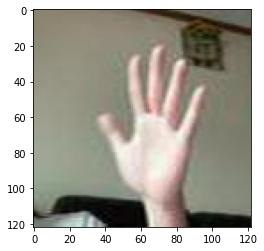

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1800])
print('라벨: ', y_train[1800])

## 딥러닝 네트워크 설계하기

![네트워크 설계 정리](https://d3s0tskafalll9.cloudfront.net/media/images/F-1-5.max-800x600.png)

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(815)
# hyper parameters
n_channel_1=32
n_channel_2=64
n_dense=32
img_size=122

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu')) 
model.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기의 클래스 수

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [27]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1722400   
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

## 딥러닝 네트워크 학습시키기

In [28]:
# hyper parameters
n_train_epoch=10

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 116.0343 - accuracy: 0.4891
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.1257 - accuracy: 0.9561
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.0850 - accuracy: 0.9713
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 1.4431e-04 - accuracy: 1.0000
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 9.7239e-05 - accuracy: 1.0000
Epoch 8/10
66/66 [==============================] - 1s 21ms/step - loss: 5.9657e-05 - accuracy: 1.0000
Epoch 9/10
66/66 [==============================] - 1s 21ms/step - loss: 3.8338e-05 - accuracy: 1.0000
Epoch 10/10
66/66 [==============================] - 1s 21ms/step - loss: 3.6854e-05 - accu

## 모델 성능 검증하기

### test data 불러오기

In [ ]:
number_of_data = 0
categories = ["rock", "scissor", "paper"]
for category in categories:
    image_dir_path = os.path.join(os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/" + category)
    number_of_data += resize_images(image_dir_path)

    print(category, "이미지 resize 완료")

In [30]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, number_of_data)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 122, 122, 3)
y_train shape: (300,)


### 성능 측정하기

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.4125 - accuracy: 0.4333
test_loss: 4.412539005279541 
test_accuracy: 0.4333333373069763


### 어떤 데이터를 잘못 추론했을까?

In [32]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.591644   0.21159852 0.1967575 ]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


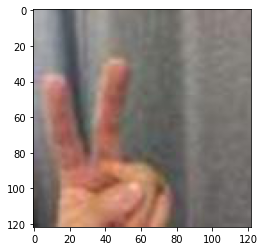

In [33]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.9733549e-01 1.0416400e-08 2.6644545e-03]
라벨: 1, 예측결과: 0


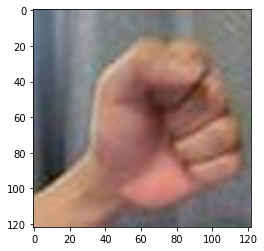

예측확률분포: [3.0650504e-04 1.8308844e-03 9.9786264e-01]
라벨: 0, 예측결과: 2


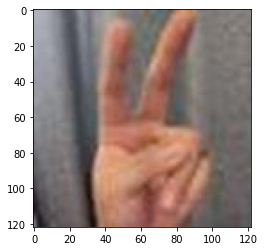

예측확률분포: [6.8203814e-04 1.2844734e-04 9.9918956e-01]
라벨: 1, 예측결과: 2


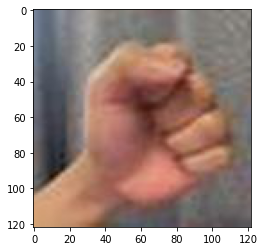

예측확률분포: [0.02642624 0.00248604 0.9710877 ]
라벨: 0, 예측결과: 2


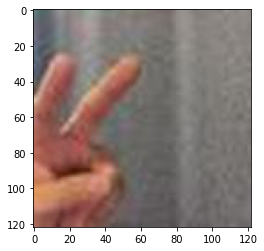

예측확률분포: [0.9146762  0.01337059 0.07195322]
라벨: 1, 예측결과: 0


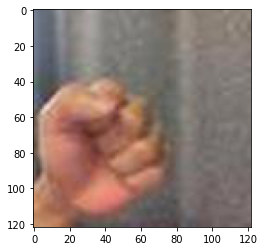

예측확률분포: [9.9731594e-01 9.2482493e-14 2.6840270e-03]
라벨: 2, 예측결과: 0


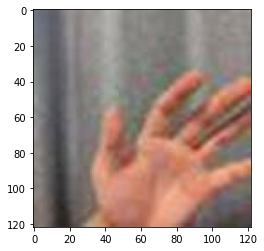

예측확률분포: [2.1922018e-02 1.5884232e-04 9.7791916e-01]
라벨: 1, 예측결과: 2


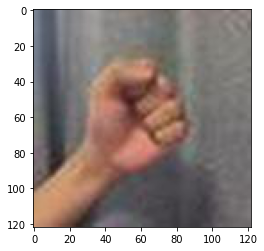

예측확률분포: [8.7934984e-03 8.3618454e-04 9.9037033e-01]
라벨: 0, 예측결과: 2


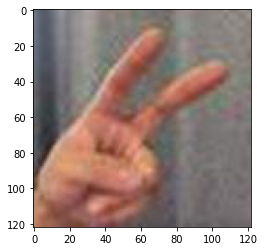

예측확률분포: [0.00399024 0.00146871 0.9945411 ]
라벨: 0, 예측결과: 2


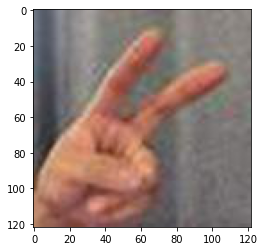

예측확률분포: [2.3153725e-03 1.2643493e-07 9.9768448e-01]
라벨: 1, 예측결과: 2


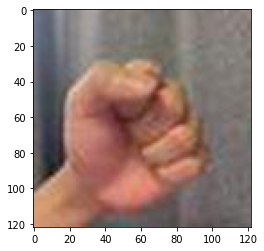

In [34]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [35]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(122,122,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                861216    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [ ]:
***

## 프로젝트 정리



__1. 데이터 준비__

- 가위, 바위, 보 이미지마다 resize을 반복해야 하므로 함수로 생성하였다.
- 이미지 개수는 모델을 훈련시키는 일련의 과정동안 추가/수정/삭제되며 변경되므로 resize_images 함수의 output으로 이미지의 개수를 받아 전체 이미지의 갯수를 셈하도록 만들었다.(load_data 함수에서 파라미터로 사용)
- 노드에서 나온 대로 28*28로 이미지 사이즈를 조정했을 떄 이미지가 너무 깨져 보여 테스트 셋과 같은 크기인 122*122로 지정했다.
- 28, 64, 122, 244 등 여러 사이즈로 시도 해봤을 때 122가 정확도가 제일 높아서 선택했다

__2. 딥러닝 네트워크 설계하기__
- 노드에 나온 MNIST 예제 코드를 활용했고, 3개의 클래스로 분류해야 하므로 마지막 Dense 레이어의 값을 3으로 설정했다.
- 학습 결과를 보며 이미지의 특성, 알고리즘의 복잡도등 하이퍼파라미터를 조정하였다.

__3. 딥러닝 네트워크 학습시키기__
- 학습반복 횟수인 10회가 되기전에 대부분의 모델의 정확도가 1로 과적합되는 결과를 보였다.
- 300장의 이미지~ 4289장의 이미지까지도 위에서 말햇듯 과적합되는 결과를 확인하였다.
__4. 모델 성능 검증하기__
- 처음에 혼자 생성한 이미지 300장으로 학습시키고 노드에 있는 test data 300장으로 테스트해본 결과 정확도가 0.3정도 나왔다.
- 훈련 데이터의 개수가 작고 테스트 데이터의 이미지와 상이해 정확도가 낮은 것이라 생각된다.
__5.  성능 향상시켜 보기__
- __train data 추가__: 노션에서 캠퍼스 사람들과 모은 데이터 셋을 추가하여 훈련 데이터를 늘려 학습시켰다. 처음엔 무작위로 6명의 데이터 셋을 추가 해보았고 데이터가 늘어나며 정확도가 높아졌으나 2천여장과 4289장의훈련 데이터 셋의 정확도가 크게 차이가 나지 않았다.

- __train data 재선정__: 노드에서 테스트 셋으로 사용한 이미지는 어두운 배경을 사용해 손이 구별이 잘가고 손모양이 화면에 꽉차는 이미지가 대부분이었다. 훈련 데이터에서 테스트 데이터와 비슷한 특징을 가지고 있는 이미지들을 선별하여 학습시켰다.
(대부분의 이미지가 팔까지 포함되어 있ㅇ..최대한 단조로운 배경과 손이 크게 나온 이미지로 선정했다..😥)

- __하이퍼파라미터 튜닝__: Conv2D 레이어의 이미지 특징 수, Dense 레이어의 뉴런 수, 학습의 epoch 값을 바꿔보며 테스트를 반복해보았다. 정확한 결과 비교를 위해서는 모델이 난수의 영향을 받으면 안되므로 set_seed를 사용해 고정시켰다.

__6.결과__

위 실행화면에 약 67%의 정확도가 나온 최선의 결과를 기록했다. 조건을 정리해보면 다음과 같다

- 데이터
    - train: 가위,바위,보 이미지 2105장(여러 명이 생성)
    - test: 가위,바위,보 이미지 300장(1명이 생성)
- 하이퍼파라미터
    - 이미지 특징 수: 16, 32
    - 뉴런 수: 32
    - epoch: 10